<a href="https://colab.research.google.com/github/Rafae1130/Cifar10/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
cifar = tf.keras.datasets.cifar10

In [3]:
(x_train, y_train), (x_test, y_test)= cifar.load_data()

In [4]:
import numpy as np

In [5]:
y_test.shape

(10000, 1)

In [6]:
y_train=y_train.flatten()
y_test=y_test.flatten()

In [7]:
x_train, x_test= x_train/255., x_test/255.

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Input, Flatten, Dropout, Dense, BatchNormalization, MaxPooling2D

In [9]:
K=len(set(y_test))

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
data= ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=0.1,
    vertical_flip=True
)

In [12]:
data_aug=data.flow(x_train, y_train, batch_size=32)

In [22]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32, (3,3), activation='relu', padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32, (3,3), activation='relu', padding='same')(i)
x=BatchNormalization()(x)
x=MaxPooling2D()(x)

x=Conv2D(64, (3,3), activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(64, (3,3), activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D()(x)

x=Conv2D(128, (3,3), activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128, (3,3), activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D()(x)

x=Flatten()(x)
x=Dense(1024, activation='relu')(x)
x=Dense(K, activation='softmax')(x)

model=Model(i,x)

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),loss=tf.keras.losses.SparseCategoricalCrossentropy( ) , metrics=['accuracy'])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 16, 16, 64)       256   

In [27]:
r=model.fit_generator(data_aug , epochs=50, validation_data=(x_test, y_test), steps_per_epoch=1563)

Epoch 1/50
   1/1563 [..............................] - ETA: 1:28 - loss: 1.1145 - accuracy: 0.5938

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


1563/1563 [==============================] - 50s 32ms/step - loss: 1.2289 - accuracy: 0.5624 - val_loss: 1.2012 - val_accuracy: 0.5776
Epoch 2/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2016 - accuracy: 0.5743 - val_loss: 1.1910 - val_accuracy: 0.5816
Epoch 3/50
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1809 - accuracy: 0.5814 - val_loss: 1.1889 - val_accuracy: 0.5847
Epoch 4/50
1563/1563 [==============================] - 46s 30ms/step - loss: 1.1666 - accuracy: 0.5878 - val_loss: 1.1806 - val_accuracy: 0.5870
Epoch 5/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1485 - accuracy: 0.5912 - val_loss: 1.1494 - val_accuracy: 0.5920
Epoch 6/50
1563/1563 [==============================] - 46s 30ms/step - loss: 1.1299 - accuracy: 0.6008 - val_loss: 1.1195 - val_accuracy: 0.6026
Epoch 7/50
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1131 - accuracy: 0.6042 - val_loss: 1.1280 - val_accura

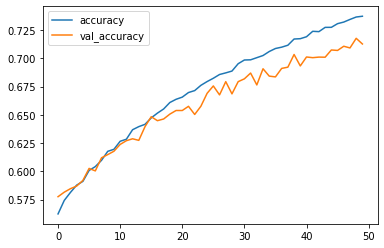

In [31]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')

plt.legend()

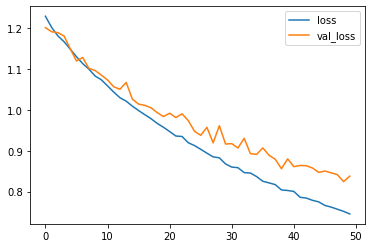

In [32]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.legend()